# Autocorrelation and Partial Autocorrelation of BTC and ETH daily returns - [for explanation read here](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # loading glitch
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

## BTC Autocorrelation

In [2]:
# Read in BTC prices
btc_prices = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/BTC-USD.csv', usecols=['Date','Adj Close'], parse_dates=True)
btc_prices = btc_prices.set_index('Date')
btc_prices['daily_return'] = btc_prices['Adj Close'].pct_change()
btc_prices = btc_prices.dropna()
btc_prices.tail()

,Adj Close,daily_return
Date,,
2022-01-22,35030.250000,-0.039143
2022-01-23,36276.804688,0.035585
2022-01-24,36654.328125,0.010407
2022-01-25,36954.003906,0.008176
2022-01-26,36852.121094,-0.002757


In [3]:
# Calculate lagged return
btc_prices['lag_return'] = btc_prices['daily_return'].shift()
btc_prices['return_diff'] = btc_prices['daily_return'].diff()
btc_prices.tail()

,Adj Close,daily_return,lag_return,return_diff
Date,,,,
2022-01-22,35030.250000,-0.039143,-0.103812,0.064668
2022-01-23,36276.804688,0.035585,-0.039143,0.074729
2022-01-24,36654.328125,0.010407,0.035585,-0.025178
2022-01-25,36954.003906,0.008176,0.010407,-0.002231
2022-01-26,36852.121094,-0.002757,0.008176,-0.010933


Text(0.5, 1.0, 'BTC Daily vs Lagged Return')

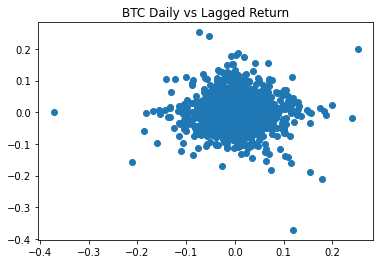

In [4]:
# Scatter plot of lagged return vs daily_return
x = btc_prices['daily_return']
y = btc_prices['lag_return']
plt.scatter(x, y)
plt.title('BTC Daily vs Lagged Return')

<AxesSubplot:title={'center':'BTC 365-day returns'}, xlabel='Date', ylabel='BTC daily return'>

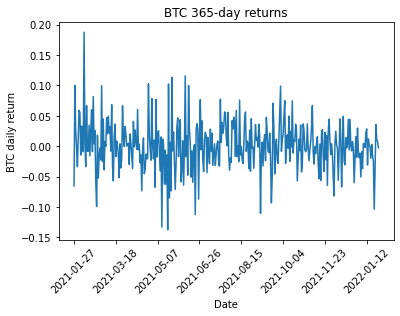

In [5]:
# Plot of last 30 days of daily return
btc_prices['daily_return'][-365:].plot(title='BTC 365-day returns', rot=45, ylabel='BTC daily return')

<AxesSubplot:title={'center':'BTC Close Trend'}, xlabel='Date'>

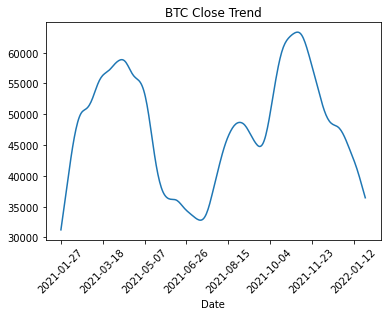

In [6]:
# Hodrick-Prescott filter
import statsmodels.api as sm

# Trend vs Noise last n days
ts_noise, ts_trend = sm.tsa.filters.hpfilter(btc_prices['Adj Close'][-365:])
ts_trend.plot(rot=45, title='BTC Close Trend')


<AxesSubplot:title={'center':'BTC Close Noise'}, xlabel='Date'>

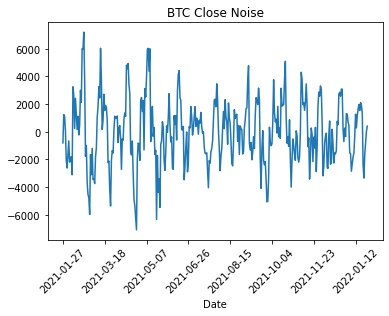

In [7]:
ts_noise.plot(rot=45, title = 'BTC Close Noise')

In [17]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(btc_prices['daily_return'])

(-15.492363730888624,
 2.475397812891686e-28,
 9,
 2678,
 {'1%': -3.432794204326531,
  '5%': -2.862619868040959,
  '10%': -2.567344850230434},
 -9724.686169047716)

In [8]:
# Autocorrelation lag 1
btc_prices['daily_return'].autocorr(lag=1)

-0.01955352942802737

In [9]:
# Autocorrelation lag 30
btc_prices['daily_return'].autocorr(lag=30)

0.00957512153954806

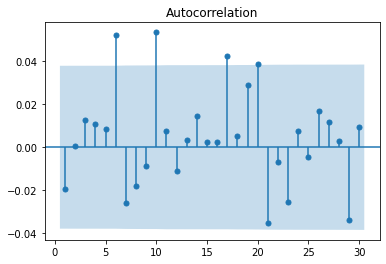

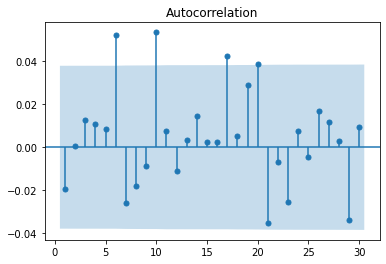

In [10]:
# Plot autocorrelation at different lags
plot_acf(btc_prices['daily_return'], lags=30, zero = False)

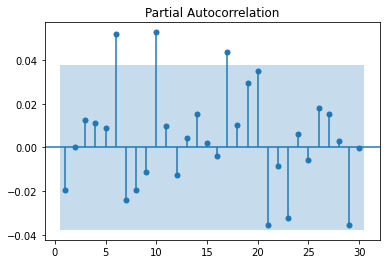

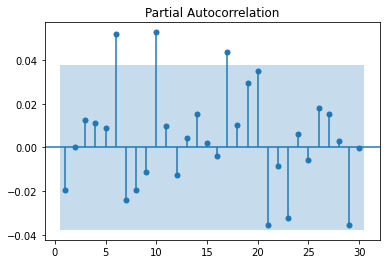

In [15]:
# Plot partial autocorrelation
sm.graphics.tsaplots.plot_pacf(btc_prices['daily_return'], alpha=0.05,lags=30, zero=False)

## ETH Autocorrelation

In [19]:
# Read in ETH prices
eth_prices = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/ETH-USD.csv', usecols=['Date','Adj Close'], parse_dates=True)
eth_prices = eth_prices.set_index('Date')
eth_prices['daily_return'] = eth_prices['Adj Close'].pct_change()
eth_prices = eth_prices.dropna()
eth_prices.tail()

,Adj Close,daily_return
Date,,
2022-01-22,2405.181152,-0.059716
2022-01-23,2535.039063,0.053991
2022-01-24,2440.352295,-0.037351
2022-01-25,2455.935059,0.006385
2022-01-26,2468.030273,0.004925


In [20]:
# Calculate lagged return
eth_prices['lag_return'] = eth_prices['daily_return'].shift()
eth_prices['return_diff'] = eth_prices['daily_return'].diff()
eth_prices.tail()

,Adj Close,daily_return,lag_return,return_diff
Date,,,,
2022-01-22,2405.181152,-0.059716,-0.147674,0.087958
2022-01-23,2535.039063,0.053991,-0.059716,0.113707
2022-01-24,2440.352295,-0.037351,0.053991,-0.091342
2022-01-25,2455.935059,0.006385,-0.037351,0.043737
2022-01-26,2468.030273,0.004925,0.006385,-0.001461


Text(0.5, 1.0, 'ETH Daily vs Lagged Return')

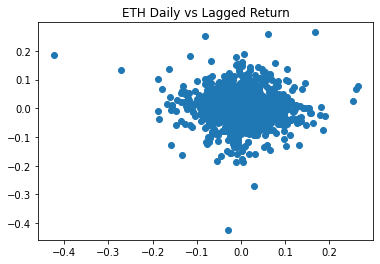

In [21]:
# Scatter plot of lagged return vs daily_return
x = eth_prices['lag_return']
y = eth_prices['daily_return']
plt.scatter(x, y)
plt.title('ETH Daily vs Lagged Return')

<AxesSubplot:title={'center':'ETH 365-day returns'}, xlabel='Date', ylabel='ETH daily return'>

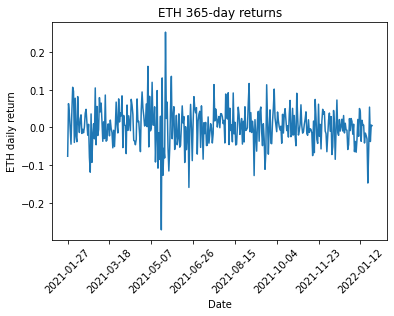

In [22]:
# Plot of last 365 days of daily return
eth_prices['daily_return'][-365:].plot(title='ETH 365-day returns', rot=45, ylabel='ETH daily return')

<AxesSubplot:title={'center':'ETH Close Trend'}, xlabel='Date'>

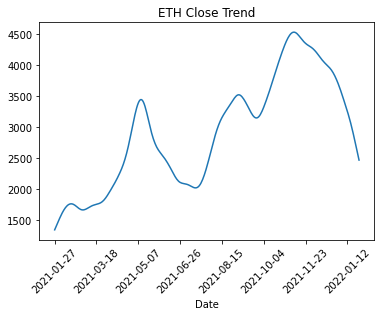

In [23]:
# Trend vs Noise 
# Hodrick-Prescott filter
import statsmodels.api as sm

ts_noise, ts_trend = sm.tsa.filters.hpfilter(eth_prices['Adj Close'][-365:])
ts_trend.plot(rot=45, title='ETH Close Trend')


<AxesSubplot:title={'center':'ETH Close Noise'}, xlabel='Date'>

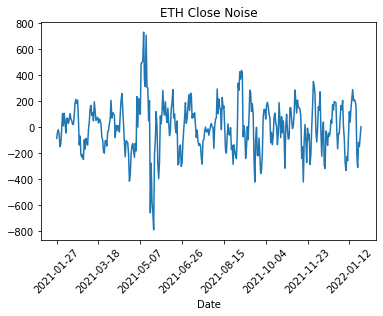

In [24]:
ts_noise.plot(rot=45, title = 'ETH Close Noise')

In [25]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(eth_prices['daily_return'])

(-11.498294899788084,
 4.556938306169594e-21,
 9,
 1529,
 {'1%': -3.434634049963598,
  '5%': -2.863432142744973,
  '10%': -2.5677773493449725},
 -4675.785138270634)

In [ ]:
# Autocorrelation lag 1
eth_prices['daily_return'].autocorr(lag=1)

-0.04326831986031416

In [ ]:
# Autocorrelation lag 30
eth_prices['daily_return'].autocorr(lag=30)

0.02452844127292927

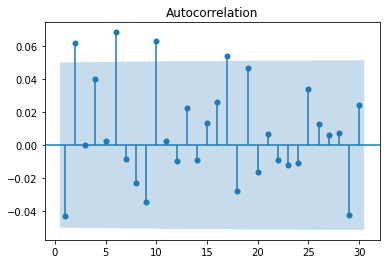

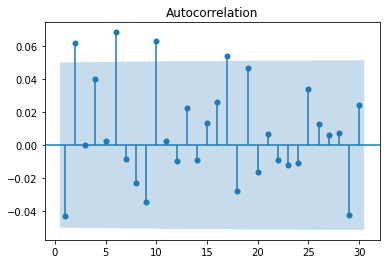

In [ ]:
# Plot autocorrelation at different lags
plot_acf(eth_prices['daily_return'], lags=30, zero = False)

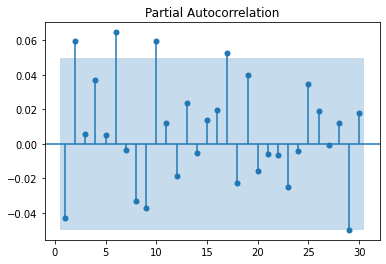

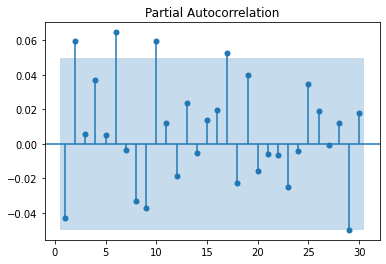

In [ ]:
# Plot partial autocorrelation
sm.graphics.tsaplots.plot_pacf(eth_prices['daily_return'], lags=30, zero=False)